In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib  import Path
from IPython.display import clear_output
import time

def cprint(*args):
    clear_output()
    print(*args)
    time.sleep(1)

In [45]:
DATA_PATH = Path('exp/20220418/data')

In [46]:
def load_data(path:str):
    df = pd.read_csv(path)
    js = json.loads(df['tricks'][0])
    return js

In [47]:
data1 = load_data('data/project-3-at-2022-04-08-02-02-ff297c55.csv')
data2 = load_data('data/project-6-at-2022-04-08-02-03-f42996b2.csv')

In [48]:
def list2df(data):
    output_df = pd.DataFrame()
    for d in data:
        _df = pd.DataFrame.from_dict(d)
        output_df=pd.concat([output_df,_df],axis=0).reset_index(drop=True)
    return output_df

def reverse_labels(x):
    if x=='OA':
        return 'OB'
    elif x=='OB':
        return 'OA'
    elif x=='XA':
        return 'XB'
    elif x=='XB':
        return 'XA'
    else:
        raise ValueError

In [49]:
data1 = list2df(data1)
data2 = list2df(data2)
data2.labels = data2.labels.apply(reverse_labels)

In [50]:
display(data1.head())
display(data2.head())
display(data1.shape,data2.shape)

,start,end,labels
0,1.984317,2.306247,OB
1,2.515939,2.715939,OA
2,2.975939,3.125939,OB
3,3.315939,3.485939,XA
4,3.815939,3.955940,OB


,start,end,labels
0,1.398252,1.963475,OB
1,2.429167,2.779167,OA
2,2.985708,3.135688,OB
3,3.192625,3.259283,XA
4,3.775880,3.842538,OB


(133, 3)

(130, 3)

In [51]:
def get_color(x):
    if x=='OA':
        return 'r'
    elif x=='OB':
        return 'b'
    elif x=='XA':
        return 'g'
    elif x=='XB':
        return 'c'
    else:
        raise ValueError

def y_label(x):
    if x=='OA':
        return 1
    elif x=='OB':
        return -1
    elif x=='XA':
        return 2
    elif x=='XB':
        return -2
    else:
        raise ValueError

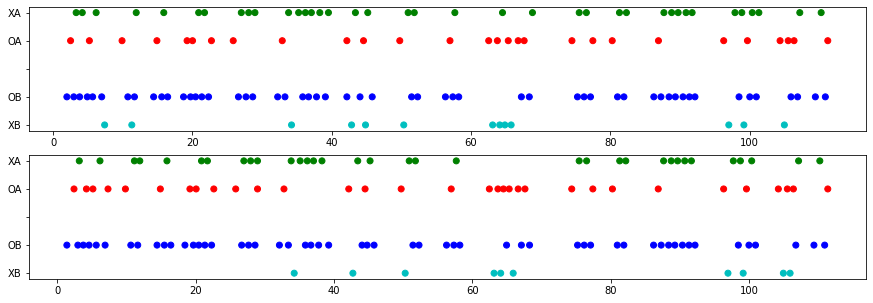

In [52]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
ax1.set_yticks([-2,-1,0,1,2]) 
ax1.set_yticklabels(['XB','OB','','OA','XA'])
ax1.scatter(
    x=data1.start,
    y=list(map(y_label,data1.labels)),
    # y=data1.labels,
    color=list(map(get_color,data1.labels)),
)

ax2 = fig.add_subplot(212)
ax2.set_yticks([-2,-1,0,1,2]) 
ax2.set_yticklabels(['XB','OB','','OA','XA'])
ax2.scatter(
    x=data2.start,
    # y=data2.labels,
    y=list(map(y_label,data2.labels)),
    color=list(map(get_color,data2.labels))
)

<BarContainer object of 130 artists>

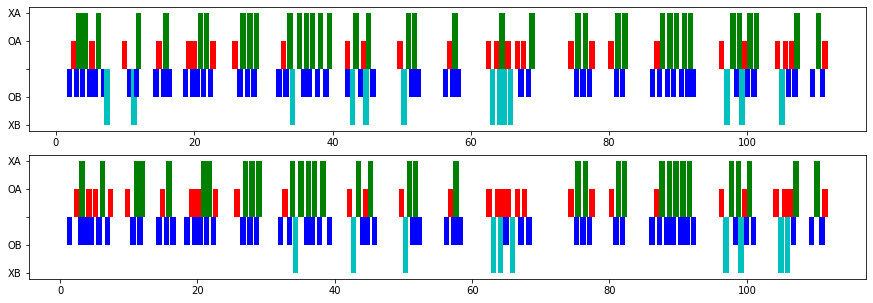

In [53]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
ax1.bar(
    x=data1.start,
    height=list(map(y_label,data1.labels)),
    color=list(map(get_color,data1.labels)),
)
ax1.set_yticks([-2,-1,0,1,2]) 
ax1.set_yticklabels(['XB','OB','','OA','XA'])

ax2 = fig.add_subplot(212)
ax2.set_yticks([-2,-1,0,1,2]) 
ax2.set_yticklabels(['XB','OB','','OA','XA'])
ax2.bar(
    x=data2.start,
    height=list(map(y_label,data2.labels)),
    color=list(map(get_color,data2.labels))
)

In [54]:
start1 = data1.start
start2 = data2.start

In [55]:
# 縦軸 1人目、横軸２人で cost[i][j] = 差を示す

cost_df = pd.DataFrame()
for i,two in enumerate(start2.to_numpy()):
    cost = start1.apply(lambda x: abs(x-two)).rename(i)
    cost_df = pd.concat([cost_df,cost],axis=1).reset_index(drop=True)

cost_df = cost_df.T

In [56]:
cost_df

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.586065,1.117687,1.577687,1.917688,2.417688,2.797688,3.517688,3.817689,4.287689,4.787689,...,103.590083,104.140083,104.540083,104.981750,105.490084,105.806751,108.040085,108.873419,109.473419,109.823419
1,0.444850,0.086772,0.546772,0.886772,1.386773,1.766773,2.486773,2.786773,3.256774,3.756774,...,102.559168,103.109168,103.509168,103.950835,104.459169,104.775835,107.009170,107.842504,108.442504,108.792504
2,1.001392,0.469769,0.009769,0.330231,0.830231,1.210231,1.930232,2.230232,2.700232,3.200232,...,102.002626,102.552627,102.952627,103.394294,103.902627,104.219294,106.452629,107.285962,107.885963,108.235963
3,1.208308,0.676686,0.216686,0.123314,0.623314,1.003315,1.723315,2.023315,2.493315,2.993316,...,101.795709,102.345710,102.745710,103.187377,103.695710,104.012377,106.245712,107.079045,107.679046,108.029046
4,1.791563,1.259941,0.799941,0.459941,0.040060,0.420060,1.140060,1.440060,1.910061,2.410061,...,101.212455,101.762455,102.162455,102.604122,103.112456,103.429122,105.662457,106.495791,107.095791,107.445791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,105.177537,104.645915,104.185915,103.845915,103.345915,102.965914,102.245914,101.945914,101.475914,100.975913,...,2.173519,1.623519,1.223519,0.781852,0.273519,0.043148,2.276483,3.109817,3.709817,4.059817
126,107.396984,106.865362,106.405362,106.065362,105.565361,105.185361,104.465361,104.165361,103.695361,103.195360,...,4.392966,3.842966,3.442966,3.001299,2.492965,2.176299,0.057036,0.890370,1.490370,1.840370
127,108.246985,107.715363,107.255362,106.915362,106.415362,106.035362,105.315361,105.015361,104.545361,104.045361,...,5.242967,4.692967,4.292966,3.851299,3.342966,3.026299,0.792965,0.040369,0.640369,0.990370
128,108.946985,108.415363,107.955363,107.615362,107.115362,106.735362,106.015362,105.715362,105.245361,104.745361,...,5.942967,5.392967,4.992967,4.551300,4.042966,3.726299,1.492965,0.659631,0.059631,0.290369


In [149]:
pair = []
for i in range(len(cost_df)):
    _cost = cost_df.iloc[i,:]
    j = _cost.idxmin()
    pair.append((i,j))


In [154]:
labels_pair = []
for i, j in pair:
    one_label = data1.iloc[i,:].labels
    two_label = data2.iloc[j,:].labels
    labels_pair.append([one_label,two_label])


In [161]:
wrong_cnt = 0
wrong_examples = []
for idx,(i,j) in enumerate(labels_pair):
    if i!=j:
        wrong_cnt += 1
        wrong_examples.append(idx)
print(f'{100*wrong_cnt/len(labels_pair)}%')

6.153846153846154%


In [162]:
for i in wrong_examples:
    print(i, labels_pair[i])

5 ['OA', 'XA']
11 ['OA', 'XB']
14 ['XA', 'XB']
38 ['OA', 'XA']
58 ['OB', 'XB']
76 ['OA', 'XA']
77 ['OB', 'XB']
122 ['XB', 'OB']
